<a href="https://colab.research.google.com/github/DenZhid/DeepLearningLabs/blob/master/lab2/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Начальная настройка и входные данные**

**Необходимые импорты**

In [1]:
from numpy import array
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import LSTM, GRU
from keras.models import Model

import numpy as np

import matplotlib.pyplot as plt

import csv
import os

**Массивы данных**

--2022-04-14 08:35:54--  https://github.com/DenZhid/DeepLearningLabs/raw/master/lab2/resources/kirkorov_search_trend_2015_2020.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DenZhid/DeepLearningLabs/master/lab2/resources/kirkorov_search_trend_2015_2020.csv [following]
--2022-04-14 08:35:54--  https://raw.githubusercontent.com/DenZhid/DeepLearningLabs/master/lab2/resources/kirkorov_search_trend_2015_2020.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3731 (3.6K) [text/plain]
Saving to: ‘kirkorov_search_trend_2015_2020.csv’

kirkorov_search_tre 100%[===================>]   3.64K  --.-KB/

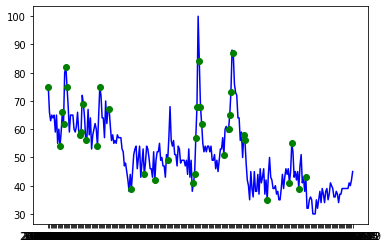

In [2]:
if not os.path.exists('kirkorov_search_trend_2015_2020.csv'):
  !wget https://github.com/DenZhid/DeepLearningLabs/raw/master/lab2/resources/kirkorov_search_trend_2015_2020.csv

if not os.path.exists('neural_networks_trend_2015-2020.csv'):
  !wget https://github.com/DenZhid/DeepLearningLabs/raw/master/lab2/resources/neural_networks_trend_2015-2020.csv

if not os.path.exists('videocards_search_trend_2015-2020.csv'):
  !wget https://github.com/DenZhid/DeepLearningLabs/raw/master/lab2/resources/videocards_search_trend_2015-2020.csv

dates = []
values = []
with open('videocards_search_trend_2015-2020.csv', 'r', newline='') as csvfile:
  spamreader = csv.reader(csvfile, delimiter=',')
  list_of_data = []
  for row in spamreader:
    list_of_data.append(row)
  for i in range(0, 3):
    list_of_data.pop(0)
  for data in list_of_data:
    dates.append(data[0])
    values.append(int(data[1]))
X_train = []
X_train.append([values[0], values[0], values[0]])
X_train.append([values[1], values[0], values[0]])
X_train.append([values[2], values[1], values[0]])
X_train.append([values[3], values[2], values[0]])
for i in range(4, len(values)):
  X_train.append([values[i], values[i-1], values[i-4]])

Y_train = []
if (values[0] - values[2] >= 10 or values[0] - values[2] <= -10): 
  Y_train.append(1)
for i in range(1, len(values)-2):
  if (values[i] - values[i+2] >= 10 and values[i-1] - values[i] >= -10
      or values[i] - values[i+2] <= -10 and values[i-1] - values[i] <= 10):
    Y_train.append(1)
  else:
    Y_train.append(0)
Y_train.append(0)
Y_train.append(0)
plt.plot(dates, values, 'blue')
for i in range(0, len(Y_train)):
  if (Y_train[i] == 1):
    plt.plot(dates[i], values[i], 'go')

X_train = array(X_train).reshape(len(X_train), 3, 1)
Y_train = array(Y_train)

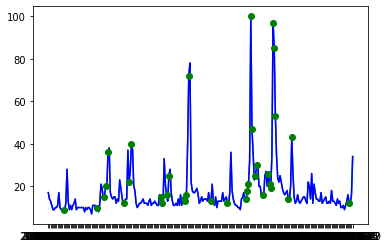

In [3]:
dates_1 = []
values_1 = []
with open('kirkorov_search_trend_2015_2020.csv', 'r', newline='') as csvfile:
  spamreader = csv.reader(csvfile, delimiter=',')
  list_of_data = []
  for row in spamreader:
    list_of_data.append(row)
  for i in range(0, 3):
    list_of_data.pop(0)
  for data in list_of_data:
    dates_1.append(data[0])
    values_1.append(int(data[1]))
  plt.plot(dates_1, values_1)
X_test_1 = []
X_test_1.append([values_1[0], values_1[0], values_1[0]])
X_test_1.append([values_1[1], values_1[0], values_1[0]])
X_test_1.append([values_1[2], values_1[1], values_1[0]])
X_test_1.append([values_1[3], values_1[2], values_1[0]])
for i in range(4, len(values_1)):
  X_test_1.append([values_1[i], values_1[i-1], values_1[i-4]])

Y_test_1 = []
if (values_1[0] - values_1[2] >= 10 or values_1[0] - values_1[2] <= -10): 
  Y_test_1.append(1)
for i in range(1, len(values_1)-2):
  if (values_1[i] - values_1[i+2] >= 10 and values_1[i-1] - values_1[i] >= -10
      or values_1[i] - values_1[i+2] <= -10 and values_1[i-1] - values_1[i] <= 10):
    Y_test_1.append(1)
  else:
    Y_test_1.append(0)
Y_test_1.append(0)
Y_test_1.append(0)
plt.plot(dates_1, values_1, 'blue')
for i in range(0, len(Y_test_1)):
  if (Y_test_1[i] == 1):
    plt.plot(dates_1[i], values_1[i], 'go')

X_test_1 = array(X_test_1).reshape(len(X_test_1), 3, 1)
Y_test_1 = array(Y_test_1)

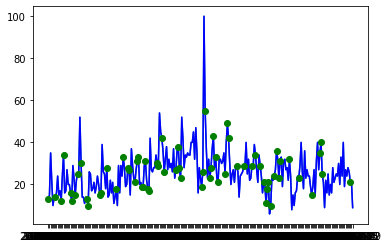

In [4]:
dates_2 = []
values_2 = []
with open('neural_networks_trend_2015-2020.csv', 'r', newline='') as csvfile:
  spamreader = csv.reader(csvfile, delimiter=',')
  list_of_data = []
  for row in spamreader:
    list_of_data.append(row)
  for i in range(0, 3):
    list_of_data.pop(0)
  for data in list_of_data:
    dates_2.append(data[0])
    values_2.append(int(data[1]))
  plt.plot(dates_2, values_2)
X_test_2 = []
X_test_2.append([values_2[0], values_2[0], values_2[0]])
X_test_2.append([values_2[1], values_2[0], values_2[0]])
X_test_2.append([values_2[2], values_2[1], values_2[0]])
X_test_2.append([values_2[3], values_2[2], values_2[0]])
for i in range(4, len(values_2)):
  X_test_2.append([values_2[i], values_2[i-1], values_2[i-4]])

Y_test_2 = []
if (values_2[0] - values_2[2] >= 10 or values_2[0] - values_2[2] <= -10): 
  Y_test_2.append(1)
for i in range(1, len(values_2)-2):
  if (values_2[i] - values_2[i+2] >= 10 and values_2[i-1] - values_2[i] >= -10
      or values_2[i] - values_2[i+2] <= -10 and values_2[i-1] - values_2[i] <= 10):
    Y_test_2.append(1)
  else:
    Y_test_2.append(0)
Y_test_2.append(0)
Y_test_2.append(0)
plt.plot(dates_2, values_2, 'blue')
for i in range(0, len(Y_test_2)):
  if (Y_test_2[i] == 1):
    plt.plot(dates_2[i], values_2[i], 'go')

X_test_2 = array(X_test_2).reshape(len(X_test_2), 3, 1)
Y_test_2 = array(Y_test_2)

# **Имплементация GRU нейронной сети**


**Обучение нейронной сети**

In [5]:
model_GRU = Sequential()
model_GRU.add(GRU(50, activation='relu', input_shape=(3, 1)))
model_GRU.add(Dense(1))
model_GRU.compile(optimizer='adam', loss='mse')

history_GRU = model_GRU.fit(X_train, Y_train, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
7/7 [==============================] - 2s 51ms/step - loss: 14.5028 - val_loss: 2.2443
Epoch 2/1000
7/7 [==============================] - 0s 8ms/step - loss: 3.1609 - val_loss: 0.0685
Epoch 3/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.4352 - val_loss: 0.8165
Epoch 4/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.7507 - val_loss: 0.7574
Epoch 5/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.4569 - val_loss: 0.2910
Epoch 6/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.2346 - val_loss: 0.1035
Epoch 7/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.2298 - val_loss: 0.0686
Epoch 8/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.2209 - val_loss: 0.0793
Epoch 9/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.1906 - val_loss: 0.1090
Epoch 10/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.1749 - val_loss: 0.1329
Epoch 11/1000
7/7

**Проверка на других данных**

Точность с учётом корректно неопределённых точек, где модель не сменяется:  80 %
Точность с учётом определения только точек, где модель сменяется:  14 %


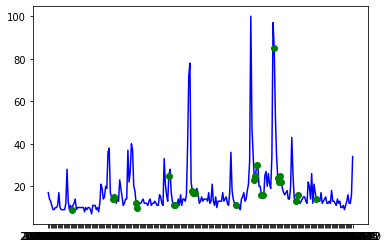

In [15]:
test_output = model_GRU.predict(X_test_1, verbose=0)
plt.plot(dates_1, values_1, 'blue')
for i in range(0, len(test_output)):
  if (test_output[i] > 0.5):
    plt.plot(dates_1[i], values_1[i], 'go')
right_results = 0
change_point_right_results = 0
all_change_point_results = 0
all_results = 0
for i in range(0, len(Y_test_1)):
  all_results += 1
  if (Y_test_1[i] == 1):
    all_change_point_results += 1
    if (test_output[i] > 0.5):
      change_point_right_results += 1
      right_results += 1
  if (Y_test_1[i] == 0 and test_output[i] <= 0.5):
      right_results += 1
print("Точность с учётом корректно неопределённых точек, где модель не сменяется: ", int(right_results / all_results * 100), "%")
print("Точность с учётом определения только точек, где модель сменяется: ", int(change_point_right_results / all_change_point_results * 100), "%")

Точность с учётом корректно неопределённых точек, где модель не сменяется:  68 %
Точность с учётом определения только точек, где модель сменяется:  21 %


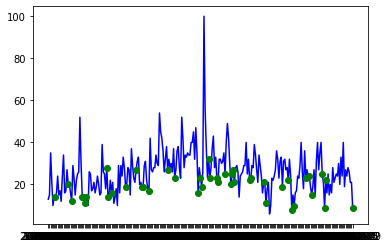

In [16]:
test_output = model_GRU.predict(X_test_2, verbose=0)
plt.plot(dates_2, values_2, 'blue')
for i in range(0, len(test_output)):
  if (test_output[i] > 0.5):
    plt.plot(dates_2[i], values_2[i], 'go')
right_results = 0
change_point_right_results = 0
all_change_point_results = 0
all_results = 0
for i in range(0, len(Y_test_2)):
  all_results += 1
  if (Y_test_2[i] == 1):
    all_change_point_results += 1
    if (test_output[i] > 0.5):
      change_point_right_results += 1
      right_results += 1
  if (Y_test_2[i] == 0 and test_output[i] <= 0.5):
      right_results += 1
print("Точность с учётом корректно неопределённых точек, где модель не сменяется: ", int(right_results / all_results * 100), "%")
print("Точность с учётом определения только точек, где модель сменяется: ", int(change_point_right_results / all_change_point_results * 100), "%")

# **Имплементация LSTM нейронной сети**

**Обучение нейронной сети**

In [8]:
model_LSTM = Sequential()
model_LSTM.add(LSTM(50, activation='relu', input_shape=(3, 1)))
model_LSTM.add(Dense(1))
model_LSTM.compile(optimizer='adam', loss='mse')

history_LSTM = model_LSTM.fit(X_train, Y_train, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
7/7 [==============================] - 1s 46ms/step - loss: 3.4304 - val_loss: 1.7543
Epoch 2/1000
7/7 [==============================] - 0s 10ms/step - loss: 1.1739 - val_loss: 0.0925
Epoch 3/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.7409 - val_loss: 0.0565
Epoch 4/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.2769 - val_loss: 0.2155
Epoch 5/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.2141 - val_loss: 0.0630
Epoch 6/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.2245 - val_loss: 0.0502
Epoch 7/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.1522 - val_loss: 0.0644
Epoch 8/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.1439 - val_loss: 0.0605
Epoch 9/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.1426 - val_loss: 0.0484
Epoch 10/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.1329 - val_loss: 0.0483
Epoch 11/1000
7/7

**Проверка на других данных**

Точность с учётом корректно неопределённых точек, где модель не сменяется:  86 %
Точность с учётом определения только точек, где модель сменяется:  2 %


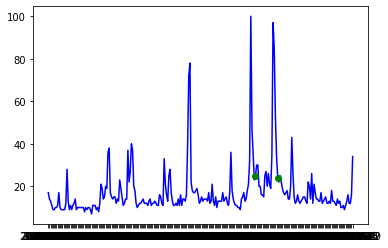

In [17]:
test_output = model_LSTM.predict(X_test_1, verbose=0)
plt.plot(dates_1, values_1, 'blue')
for i in range(0, len(test_output)):
  if (test_output[i] > 0.5):
    plt.plot(dates_1[i], values_1[i], 'go')
right_results = 0
change_point_right_results = 0
all_change_point_results = 0
all_results = 0
for i in range(0, len(Y_test_1)):
  all_results += 1
  if (Y_test_1[i] == 1):
    all_change_point_results += 1
    if (test_output[i] > 0.5):
      change_point_right_results += 1
      right_results += 1
  if (Y_test_1[i] == 0 and test_output[i] <= 0.5):
      right_results += 1
print("Точность с учётом корректно неопределённых точек, где модель не сменяется: ", int(right_results / all_results * 100), "%")
print("Точность с учётом определения только точек, где модель сменяется: ", int(change_point_right_results / all_change_point_results * 100), "%")

Точность с учётом корректно неопределённых точек, где модель не сменяется:  74 %
Точность с учётом определения только точек, где модель сменяется:  1 %


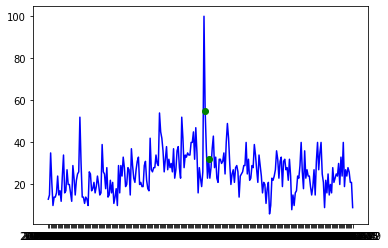

In [18]:
test_output = model_LSTM.predict(X_test_2, verbose=0)
plt.plot(dates_2, values_2, 'blue')
for i in range(0, len(test_output)):
  if (test_output[i] > 0.5):
    plt.plot(dates_2[i], values_2[i], 'go')
right_results = 0
change_point_right_results = 0
all_change_point_results = 0
all_results = 0
for i in range(0, len(Y_test_2)):
  all_results += 1
  if (Y_test_2[i] == 1):
    all_change_point_results += 1
    if (test_output[i] > 0.5):
      change_point_right_results += 1
      right_results += 1
  if (Y_test_2[i] == 0 and test_output[i] <= 0.5):
      right_results += 1
print("Точность с учётом корректно неопределённых точек, где модель не сменяется: ", int(right_results / all_results * 100), "%")
print("Точность с учётом определения только точек, где модель сменяется: ", int(change_point_right_results / all_change_point_results * 100), "%")